# Question 1
*(15 points) You should solve this problem before you answer the programming part of HW4.*

*(a) (3 points) Formulate a linear program for the min-cost flow problem described in HW4-programming.*

Minimize: $$\ \ \ \  \sum_{(i,\ j)\in E}\ w_{ij} \ f_{ij} $$


Subject to: $$1.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ f_{ij} \leq\ c_{ij}\ \text{for each }i,\ j\ \in V \ \ $$
            $$2.\ \ \ \ \  \sum_{j \in V}f_{ji} - \sum_{j \in V}f_{ij} = d_i \text{ for each }i \in V$$
            $$3.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ f_{ij} \geq 0 \text{ for each } i,\ j \in V$$

*(b) (12 points) In formulating flow problems, we assume that there is at most one directed
edge between any two nodes. Suppose we have a network with multi-edges: now there
may be be multiple directed edges going from node i to node j, each possibly with
different capacities and weights. Show how to reduce this problem to the standard one
without multi-edges.*

In [1]:
%matplotlib inline
from IPython.display import Image

Below is a network of two nodes, u and v, with three edges from u to v. Each edge has capacity (c1, c2, c3, respectively) and weight (w1, w2, w3, respectively).

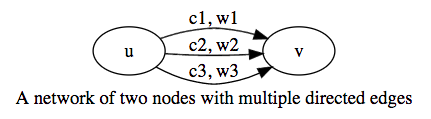

In [2]:
Image('http://i.imgur.com/IpCqIuW.png')

A network of multiple directed edges may be reduced to the standard one without multi-edges as follows. For each edge, introduce a new intermediary node. In our case, we will call these x1, x2 and x3. Capacity from u to x1, x2 and x3 will equal c1, c2 and c3, respectively. Weight from u to x1, x2 and x3 will equal w1, w2 and w3, respectively. Capacity from x1, x2 and x3 to v will also equal c1, c2 and c3, respectively. But weight from x1, x2 and x3 will all equal zero. This effectively reduces the multi-edged network into the standard one without multi-edges. The transformation is depicted below.

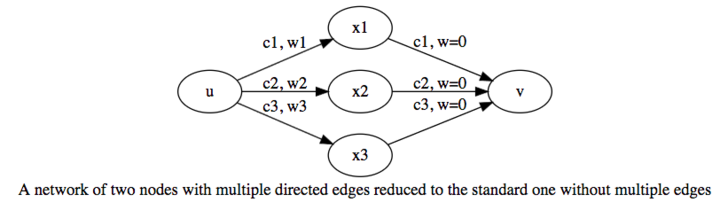

In [3]:
Image('http://i.imgur.com/THbZhuEg.png')

# Question 2
*(25 points) A dominating set in a directed graph G = (V, E) is a set of vertices S such that,
for every v $\notin$ S, there is a u ∈ S with (u, v) ∈ E. In other words, every vertex either belongs
to the dominating set or one of its immediate neighbors does.*

*Finding a small dominating set is a building block to solving a number of problems in distributed
computing, such as partitioning a network into a small number of local clusters. An
important application of dominating sets is in the construction of an efficient backbone for
routing.*

*State the decision version of the minimization problem above and prove that it is NP complete.*

*(Hint: reduction from Vertex Cover. Consider a small instance of the dominating set problem,
e.g., a triangle: the minimum dominating set has size ?. Motivated by this observation,
modify the original graph as follows: for every edge e = (u, v), introduce a new node xe and
two edges connecting xe to u and v. Let $G'$
be the resulting graph. Show that $G$ has a vertex
cover of size k if and only if $G'$ has a dominating set of size ?.)*



Decision version of dominating set minimization problem: $DS(D)$ = Given graph $G = (V, E)$ and integer $K$, does $G$ contain a dominating set of size $\leq K$?

To prove that a problem Y is NP-complete given that a problem X is NP-complete, we need to show that:
1. $Y \in NP$ and
2. $X \leq_p Y$

Thus, to prove that $DS(D)$ is NP-complete given that vertex cover problem $VC(D)$ is NP-complete, we need to show that:
1. $DS(D) \in NP$ and
2. $VC(D) \leq_p DS(D)$

First, we will prove that $DS(D) \in NP$. NP is defined as the set of decision problems for which an efficient certifier exists. Given a candidate solution $S$ to $DS(D)$, we can check whether or not the candidate solution $S$ is a "yes instance" of $DS(D)$ in polynomial time. To do this, simply consider each vertex in $G$ and check if it is either in $S$ or if one of its edges crosses into $S$. If either condition is true for every vertex in $G$, then $S$ is a yes instance, otherwise $S$ is not a yes instance. Clearly the running time of this operation is dependent on the number of vertices in $G$ and therefore can done efficiently. So, $DS(D) \in NP$.

Second, we will prove that $DS(D)$ is NP-complete by reducing vertex cover to domating set: $VC(D) \leq_p DS(D)$. Given graph $G = (V,E)$ with an instance of vertex cover, create a new graph $G'$ that contains all edges and vertices in $G$. Assume there are no isolated vertices in $G$. For every edge $e = (u,v) \in G'$ introduce a new vertex $x_e$ and two edges connecting $x_e$ to $u$ and $v$. Note that this effectively introduces several triangles, each of which has dominating set of size = 1.

Claim: $G$ has vertex cover $S$ of size $k$ if and only if $G'$ has dominating set $S$ of size $k$. 

Forward direction proof: Each vertex in $G'$ is either (1) an original vertex from $G$ or (2) a new vertex $x_e$ introduced above, for which there is an edge connecting $x_e$ to two original vertices from $G$. If (1) a vertex in $G'$ is an original vertex from $G$, the vertex either exists in vertex cover $S$ or is incident to at least one vertex in set $S$ (by the definition of vertex cover). If (2) a vertex in $G'$ is a new vertex, then it must be adjacent to at least one vertex in $S$ since its two edges were constructed to connect itself to two nodes in $G$. Therefore, $S$ is a dominating set of size $k$ in $G'$.

Reverse direction proof: Assume that $G'$ has a dominating set $S$ of size $k$. We want to show that this dominating set $S$ exists if and only if $S$ is the vertex cover set in $G$. The newly added vertices $x_e$ in $G'$ will be removed upon transformation back to $G$. What if $S$ includes one of the newly added vertices? This is not a problem, as we can simply replace it with one of its two neighbors without increasing the size of $S$. By the definition of dominating set, every vertex not in $S$ is adjacent to at least one vertex in $S$. Thus, every edge is indident to at least one vertex in $S$, which is the definition of vertex cover. Therefore, $S$ forms the vertex cover of size $k$ in $G$.

In conclusion, $VC(D) \leq_p DS(D)$ and $DS(D) \in NP$, so $DS(D) \text{ must be} \in NP$.

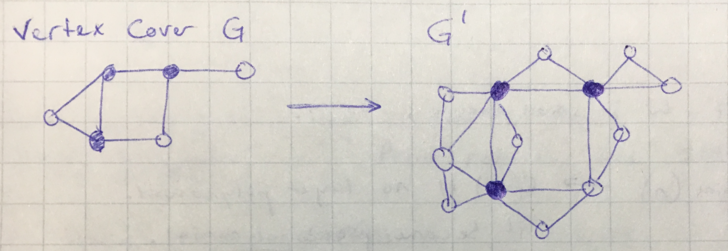

In [4]:
Image("http://i.imgur.com/4T2bSHcg.png")

# Question 3
*(30 points) Formulate linear or integer programs for the following optimization problems.*

*(a) The assignment problem: There are n persons and n objects that have to be matched
on a one-to-one basis. There’s a given set A of ordered pairs (i, j), where a pair (i, j)
indicates that person i can be matched with object j. For every pair (i, j) ∈ A, there’s
a value aij for matching person i with object j. Our goal is to assign persons to objects
so as to maximize the total value.*

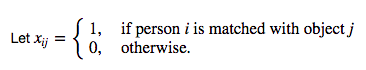

In [5]:
Image("http://i.imgur.com/2VV2sht.png")

We want to maximize the total value subject to three constraints: 1) each person matches with exactly one object, 2) each object matches with exactly one person, and 3) $x_{ij} \in [0,1]$. Thus, we can formulate this problem as an integer program:

Maximize: $$\ \ \ \  \sum_{(i,\ j)\ \in \ A} a_{ij} \cdot x_{ij}$$


Subject to: $$1.\ \ \ \ \ \ \ \ \ \ \ \sum_{i=1}^n x_{ij} = 1 \text{ for j = 1,..., n} $$
            $$2.\ \ \ \ \ \ \ \ \ \ \ \sum_{j=1}^n x_{ij} = 1 \text{ for i = 1,..., n} $$
            $$3.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x_{ij} \in [0, 1] $$

*(b) Uncapacitated facility location: There is a set F of m facilities and a set D of n
clients. For each facility i ∈ F and each client j ∈ D, there is a cost cij of assigning
client j to facility i. Further, there is a one-time cost fi associated with opening and
operating facility i. Find a subset F' of facilities to open that minimizes the total cost
of (i) operating the facilities in F' and (ii) assigning every client j to one of the facilities
in F'.*

We want to minimize the total cost of operating facilities and assigning every client to one facility. Thus our objective function will be the sum of two costs: 1) facility $i$ operating cost if facility $i$ is open + 2) assignment cost of client $j$ to facility $i$ if client $j$ is assigned to facility $i$.

First, let's introduce two indicator variables to represent 1) whether or not facility $i$ is open and 2) whether or not client $j$ is assigned to facility $i$.

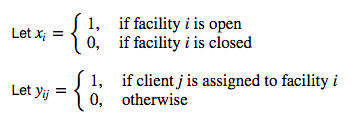

In [6]:
Image("http://i.imgur.com/BGWiPc5.png")

Our minimization problem will be subject to several constraints. I will describe them first in plain English and then mathematically.

Constraint 1: Every client must be matched to a facility. Note that because we are formulating a linear program, we will formulate this constraint as an inequality. Additionally, we need not worry about assigning more than one facility to a client. This is a minimization problem, and assigning facilities to clients has an associated cost, so there is no reason for the program to assign more than one facility to a client.

Constraint 2: If a client is assigned to a facility, the facility must then be open.

Constraint 3: $x_i$ and $y_{ij}$ must be either 1 or 0.

Now, let's formulate this as an linear program.

Minimize: $$\ \ \ \  \sum_{i=1}^{m} f_{i} \ x_{i} + \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij}\ y_{ij}$$


Subject to: $$1.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \sum_{i=1}^m y_{ij} \geq 1 \text{ for j = 1,..., n} $$
            $$2.\ \ \ \ \ \  x_i \geq y_{ij}  \text{ for i = 1,..., m; j = 1,...,n} $$
            $$3.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  x_i, i_{ij} \in [0, 1] $$

*(c) Bin packing: Given n items each of size si ∈ (0, 1], and bins of capacity 1, minimize
the number of bins needed to place every item inside a bin.
Hint: introduce (potentially exponentially!) many variables.
To this end, think of the contents of each bin as an m-tuple (t1, . . . , tm) where ti is
the number of items of size si in the bin. We call such an m-tuple a configuration
if P
i
tisi ≤ 1. So each configuration corresponds to a valid way to pack a bin. Let
T1, . . . , TN be a complete enumeration of all possible configurations. Use these configurations
to formulate a linear or integer program for bin packing.*

Consider the below matrix $t_{ij}$, where:

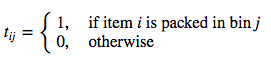

In [7]:
Image("http://i.imgur.com/iO8G587.png")

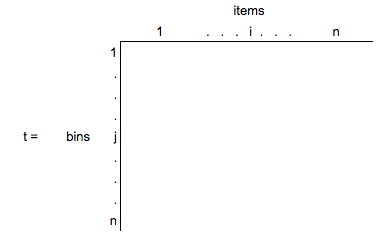

In [8]:
Image("http://i.imgur.com/7eh0jpx.png")

We want to minimize the number of bins required to store $n$ items each of size $s_i$ (where $s_i \in (0,1])$, such that 1) each item is assigned to a bin and 2) the cumulative size of the items stored in a bin does not exceed the capacity of the bin, which is = 1.

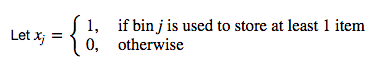

In [9]:
Image("http://i.imgur.com/al48d0k.png")

Note that if an item is assigned to bin $j$, $x_j$ must equal 1. We will include a constraint to account for this.

We can formulate this problem as a linear program.

Minimize: $$\ \ \ \  \sum_{j=1}^{n} x_{j} $$


Subject to: $$1.\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \sum_{j=1}^n t_{ij} \geq 1 \text{ for i = 1,..., n} $$
            $$2.\ \ \ \ \ \ \  x_j \geq t_{ij}  \text{ for i = 1,..., n; j = 1,...,n} $$
            $$3. \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \sum_{i=1}^n s_i \ t_{ij} \leq 1 \text{ for j = 1,...,n}$$
            $$4.\ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  x_j, t_{ij} \in [0, 1], s_{i} \in (0,1] $$

## Question 4
*(30 points) You have a data set consisting of items that a consumer has purchased on different
days and the prices at which they were purchased. You are tasked with finding bounds on
the consumer’s values (i.e., willingness to pay) for different items.*

*Specifically, let the set of items be $V = {1, . . . , n}$. Let $t = 1, . . . , k$ index the days, and let $p_1^t, ..., p_n^t$ be the prices for the different items on day $t$. If on day $t$ the consumer purchased, say, item 1, this means that it was the most preferred item at the prices on that day, leading
to the inequalities: *

$$v_1 − p_1^t \geq v_i - p_i^t \quad (i\ \in\ V)$$

*Let $T_i$ be the indices of the days on which item i was purchased, as recorded in your data
set. You would like to compute upper bounds on the consumer’s values.*

*(a) (7 points) Let $w_{ij} = min_{t\in T_i}\ {p_j^t - p_i^t}$. Formulate the system of inequalities that constrains
the values in terms of the variables $v_i$ and the constants $w_{ij}$.*

To generalize the above inequality, we know that if item $i$ is purchased on day $t$, then item $i$ must be the most preferred item given the prices on that day. In other words, the value of item $i$ minus its price $p_i^{t}$ must be greater than or equal to the value minus price of any other item $j$ on that day (otherwise, the consumer would have purchased a different item).

Thus, for items $i$ and $j$ in $V$, if item $i$ is purchased on day $t$: $v_i − p_i^t \geq v_j - p_j^t $.

We can rearrage the terms in the above inequality to yield: $v_j − v_i \leq p_j^t - p_i^t $.

So, this says that the difference between consumer values of items $j$ and $i$ is upper bound by the difference in prices of $j$ and $i$, given that item $i$ is purchased on day $t$. The tightest upper bound is given by the smallest $p_j^t - p_i^t$, which is $w_{ij}$. 

Therefore, the constraint is: $v_j − v_i \leq w_{ij}\ \text{for $i$, $j$, in $V$} $.



*(b) (7 points) Show that if $v' = (v_1^{'}, ..., v_n^{'})$ and $v^{''} = (v_1^{''}, ..., v_n^{''})$ are feasible solutions to the constraints, then so is*

$ v^{'}\ \lor \ v^{''}$ = $(max\{v_1^{'},\ v_1^{''}\},...,max\{v_n^{'},\ v_n^{''}\}). $

*From this result, you see that if you maximize the objective $\sum_{i \in V} v_i$ subject to the
feasibility constraints, the solution will give upper bounds on the values.*

If $v' = (v_1^{'}, ..., v_n^{'})$ is a feasible solution to the constraints, then $v_j^{'} - v_i^{'} \leq w_{ij}\ \text{for $i$, $j$, in $V$}.$

If $v'' = (v_1^{''}, ..., v_n^{''})$ is a feasible solution to the constraints, then $v_j^{''} - v_i^{''} \leq w_{ij}\ \text{for $i$, $j$, in $V$}.$

If we assume that $v^{'} \geq v^{''}$ for every item in $V$, then $v_j{'} = max\{v_j^{'}, v_j^{''}\}$ and $v_i{'} = max\{v_i^{'}, v_i^{''}\}$. Thus, $max\{v_j^{'}, v_j^{''}\}$ - $max\{v_i^{'}, v_i^{''}\} \leq w_{ij}$.

If we assume that $v^{''} \geq v^{'}$ for every item in $V$, then $v_j{''} = max\{v_j^{'}, v_j^{''}\}$ and $v_i{''} = max\{v_i^{'}, v_i^{''}\}$. Thus, $max\{v_j^{'}, v_j^{''}\}$ - $max\{v_i^{'}, v_i^{''}\} \leq w_{ij}$.

Therefore, $v^{'} \lor v^{''}$ is a feasbible solution to the constraints.

*(c) (16 points) Write out the linear program you have derived so far for the value bounds,
and provide its dual.*

We are interested in maximizing the consumer value, $v$, subject to the aforementioned constraints. We can formulate this as a linear program as follows:

Maximize 

$\sum_{i\ \in \ V}v_i$

subject to

$v_i - v_j \leq w_{ij}\ \text{for i, j $\in$ V}$.

Now, we will derive the above primal linear program's dual. I will use [this paper](http://www.cs.columbia.edu/coms6998-3/lpprimer.pdf) from Sebastien Lahaie of Columbia's COMS 6998 course for guidance, and will copy-and-paste some explanatory text directly from this paper as I apply it towards our problem.

**Step 1.** *If necessary, rewrite the objective as a minimization.*

In our case, the objective function is a maximization so we will rewrite it as a minimization. A solution that maximizes an objective also minimizes the negative of that objective, so this does not change the set of optimal solutions to the program.

Minimize $\sum_{i\ \in \ V}-v_i$


**Step 2.** *Rewrite each inequality constraint as a “less than or equal”, and rearrange each
constraint so that the right-hand side is 0.*

After this step our linear program now looks as follows.

Minimize $\sum_{i\ \in \ V}-v_i$

Subject to $v_i - v_j - w_{ij} \leq \ 0 \ \text{for i, j $\in$ V}$.

**Step 3.** *Define a non-negative dual variable for each inequality constraint, and an unrestricted
dual variable for each equality constraint.*

To the constraint we associate variable $\lambda_{ij} \geq 0$.

**Step 4.** *For each constraint, eliminate the constraint and add the term (dual variable)*(lefthand
side of constraint) to the objective. Maximize the result over the dual variables.*

For the first constraint, we remove it and add the following term to the objective: $\lambda_{ij} (v_i - v_j - w_{ij})$.

If we do this and maximize the result over the dual variables we get:

Maximize ($\lambda_{ij} \geq 0$) $\big[$ Minimize ($i\in V$) $\big[$ $\sum -v_i + \lambda_{ij} (v_i - v_j - w_{ij}) \big] \big]$.

It helps to think of this as a two-player game, with an “outer player” and an “inner player”.
The outer player goes first and chooses some values for $lambda$ (respecting the
constraints). With these values fixed, the inner player then chooses some values for $v_i, v_j$ and $w_{ij}$
so as to minimze the objective. Conscious that the inner player will do this, the outer player
will choose values for $\lambda$ so that the minimum value in the inner player’s minimization
problem is as large as possible.

**Step 5.** *We now have an objective with several terms of the form (dual variable) x (expression
with primal variables), plus remaining terms involving only primal variables. Rewrite the
objective so that it consists of several terms of the form (primal variable) x (expression with
dual variables), plus remaining terms involving only dual variables.*

If we do this to the objective of the previous step, we obtain:

Maximize ($\lambda_{ij} \geq 0$) $\big[$ Minimize ($i\in V$) $\big[$ $\sum_{i,j \in V} - w_{ij}\lambda_{ij} + v_i(\lambda_{ij} - 1) - v_j\lambda_{ij} \big] \big]$.

**Step 6.** *Remove each term of the form (primal variable) x (expression with dual variables)
and replace with a constraint of the form:*

• *expression ≥ 0, if the primal variable is non-negative.*

• *expression ≤ 0, if the primal variable is non-positive.*

• *expression = 0, if the primal variable is unrestricted.*

After these changes we have a new linear program. Note that the primal variables no longer appear.

Maximize$_{\lambda_{ij} \geq 0}$ $\sum_{i,j \in V} - w_{ij}\lambda_{ij}$

Subject to: 

$\lambda_{ij} - 1 \geq 0$

$-\lambda_{ij} \geq 0$

**Step 7.** *If the linear program in step 1 was rewritten as a minimization, rewrite the result
of the previous step as a minimization; otherwise, do nothing.*

Formulate the dual as a minimization.

Minimize$_{\lambda_{ij} \geq 0}$ $\sum_{i,j \in V} w_{ij}\lambda_{ij}$

Subject to: 

$\lambda_{ij} - 1 \geq 0$

$-\lambda_{ij} \geq 0$